In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_summary import DataFrameSummary
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.preprocessing import normalize

In [10]:
path = 'C:/Users/tmznq/workspace/ml_scratch/dataset/titanic/train.csv'
path2 = 'C:/Users/tmznq/workspace/ml_scratch/dataset/titanic/test.csv'
path3 = 'C:/Users/tmznq/workspace/ml_scratch/dataset/titanic/gender_submission.csv'
train_data = pd.read_csv(path)
X_test_data = pd.read_csv(path2)
y_test_data = pd.read_csv(path3)

- 1. 데이터셋 확인 - 대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재합니다. 이를 확인하고, 향후 수정합니다.
- 2. 탐색적 데이터 분석(exploratory data analysis) - 여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 insight를 얻습니다.
- 3. feature engineering - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering 합니다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.
- 4. model 만들기 - sklearn 을 사용해 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn 을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을 사용할 수 도 있습니다.
- 5. 모델 학습 및 예측 - trainset 을 가지고 모델을 학습시킨 후, testset 을 가지고 prediction 합니다.
- 6. 모델 평가 - 예측 성능이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다. 학습된 모델이 어떤 것을 학습하였는 지 확인해봅니다.

In [11]:
# 1. 데이터 살펴보기

In [12]:
DataFrameSummary(train_data).columns_stats

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
counts,891,891,891,891,891,714,891,891,891,891,204,889
uniques,891,2,3,891,2,88,7,7,681,248,147,3
missing,0,0,0,0,0,177,0,0,0,0,687,2
missing_perc,0%,0%,0%,0%,0%,19.87%,0%,0%,0%,0%,77.10%,0.22%
types,numeric,bool,numeric,unique,bool,numeric,numeric,numeric,categorical,numeric,categorical,categorical


- 결측치 
    - cabin
    - Age
    - Embarked

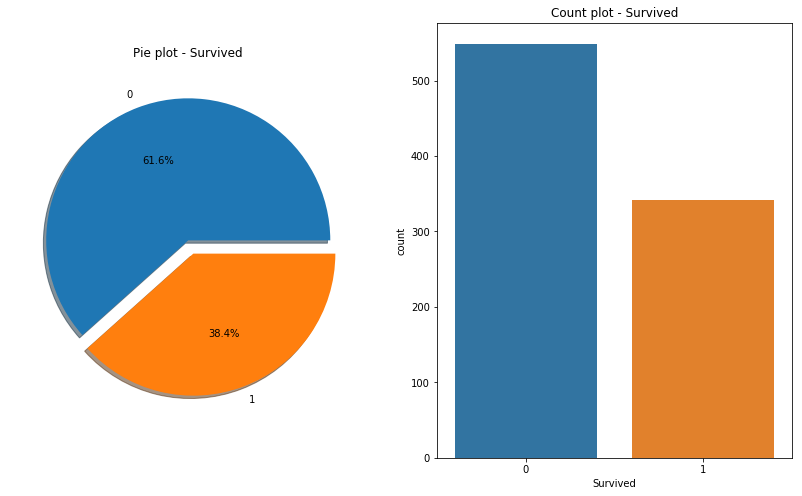

In [13]:
f, ax = plt.subplots(1, 2, figsize=(14, 8))

train_data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=train_data, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- target label 이 어떤 distribution 을 가지고 있는 지 확인해봐야 한다. 생존 여부의 분포를 보면 생존률이 38.4%에 불과.
- 지금 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있다.

In [14]:
#2. 탐색적 데이터 분석

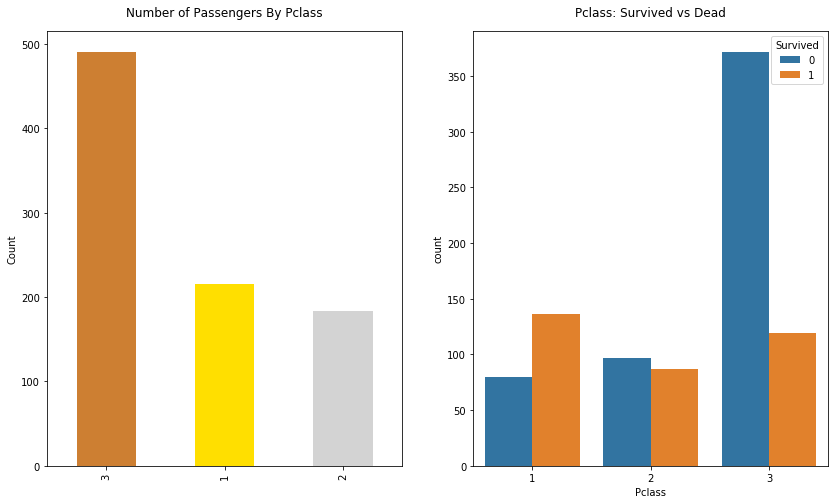

In [15]:
# Pclass
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(14, 8))
train_data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=train_data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

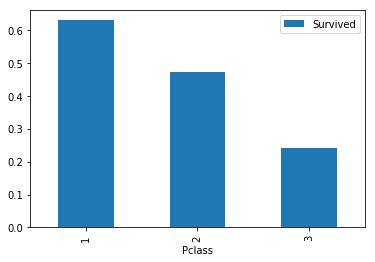

In [31]:
train_data[['Pclass', 'Survived']].groupby(by='Pclass').agg('mean').plot.bar()

- 등급 별 생존률이 다름. (1 > 2 > 3)

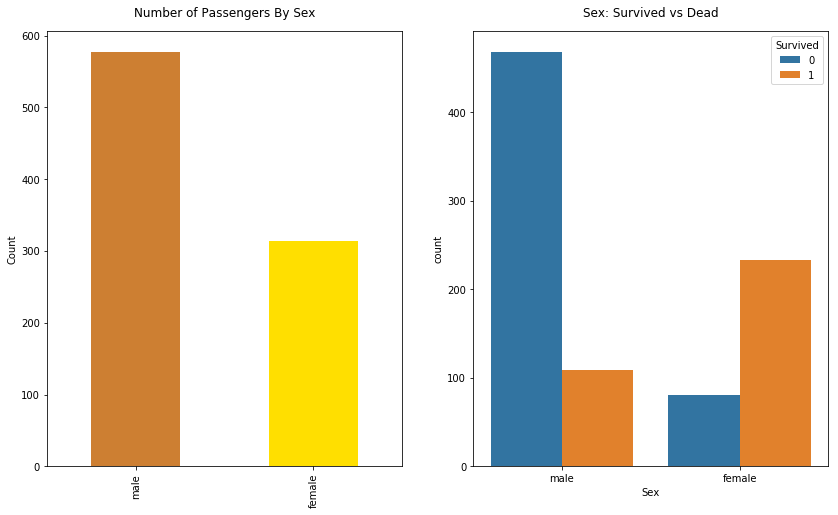

In [32]:
# Sex
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(14, 8))
train_data['Sex'].value_counts().plot.bar(color=['#CD7F32','#FFDF00'], ax=ax[0])
ax[0].set_title('Number of Passengers By Sex', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Sex', hue='Survived', data=train_data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead', y=y_position)
plt.show()

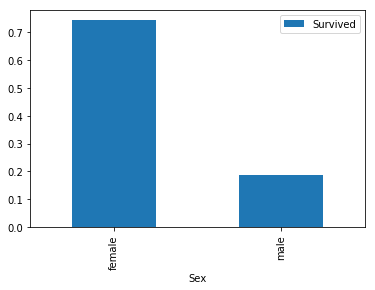

In [33]:
train_data[['Sex', 'Survived']].groupby(by='Sex').agg('mean').plot.bar()

- 여성의 생존률은 70%를 넘어가지만, 남자의 경우 20%에 불과함. 즉, 여성의 생존률이 높았다. why?

### 모델적용하기

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [27]:
# 1. LogisticReg
clf = LogisticRegression()
clf.fit(X_train, y_train)
# 훈련 세트 정확도 저장
print(clf.score(X_train, y_train))

# 일반화 정확도 저장
print(clf.score(X_test, y_test))

0.9530516431924883
0.958041958041958


C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
# 2. LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
# 훈련 세트 정확도 저장
print(clf.score(X_train, y_train))

# 일반화 정확도 저장
print(clf.score(X_test, y_test))

0.8356807511737089
0.8811188811188811


C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
